<a href="https://colab.research.google.com/github/nathanrowell/bot/blob/main/ClassifyData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/drive


[Errno 2] No such file or directory: '/content/drive/MyDrive/Github/'
/content/drive/MyDrive


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving complete_data.csv to complete_data.csv


        SEQN  AGE  FPIR  EDULVL    BMI  WAIST FAMDHIST     ALCOHOL  MVPA  \
0          5   49  5.00    high  29.10   99.9       no       heavy    60   
1         12   37  4.93    high  30.62  112.8      yes  occasional     0   
2         15   38  4.52    high  26.68   86.7       no       heavy   165   
3         20   23  3.03     low  23.68   81.0      yes    moderate     0   
4         25   42  1.77    high  37.60  114.5       no       heavy     0   
...      ...  ...   ...     ...    ...    ...      ...         ...   ...   
13359  93656   75  3.40  medium  37.90  122.0      yes  abstainers     0   
13360  93663   43  1.07     low  24.10   94.6       no  occasional     0   
13361  93664   39  4.93  medium  26.00   92.5       no  occasional     0   
13362  93677   34  1.76    high  22.20   83.3       no    moderate    20   
13363  93695   76  1.43  medium  21.50   95.0       no  abstainers     0   

             SYST  ...  encoded_4 encoded_5  encoded2_1  encoded2_2  \
0      122.00000

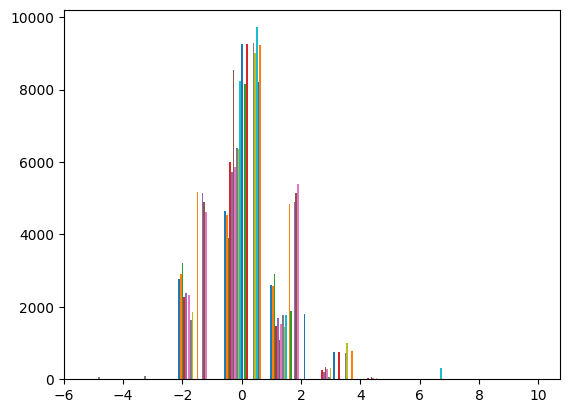

[[-0.13 -0.26  1.3   0.17  0.35 -0.64  0.22  1.22  2.54 -0.47 -0.29  1.04
  -0.48 -0.29  1.02 -1.02  0.93 -0.28 -0.33 -0.18 -0.47 -0.29]
 [-1.33  0.3   1.4   1.6   0.27  0.97 -0.28  0.5  -0.42 -0.47 -0.29  1.04
  -0.48 -0.29 -0.98  0.98  0.93 -0.28 -0.33 -0.18 -0.47 -0.29]
 [-0.87 -1.05 -0.21 -0.61 -0.24 -0.1  -0.35  0.65 -0.52 -0.47 -0.29  1.04
  -0.48 -0.29  1.02 -1.02 -1.08 -0.28 -0.33 -0.18 -0.47  3.44]
 [-0.27 -1.44  0.01 -1.28 -1.09 -0.24 -0.03  1.12  1.15 -0.47 -0.29  1.04
  -0.48 -0.29  1.02 -1.02 -1.08 -0.28 -0.33 -0.18  2.14 -0.29]
 [ 0.63  0.13 -1.1   1.52  0.73 -0.1  -0.68  0.24 -0.31 -0.47  3.49 -0.97
  -0.48 -0.29 -0.98  0.98 -1.08 -0.28  3.   -0.18 -0.47 -0.29]
 [ 0.82  1.03 -0.58 -0.96 -0.87 -0.64  0.12 -0.85 -0.69 -0.47  3.49 -0.97
  -0.48 -0.29 -0.98  0.98 -1.08 -0.28 -0.33 -0.18  2.14 -0.29]
 [-0.43  0.58 -0.49  0.53  0.7   1.78  1.2   0.03  0.39 -0.47 -0.29  1.04
  -0.48 -0.29 -0.98  0.98  0.93 -0.28 -0.33 -0.18 -0.47 -0.29]
 [-0.67  0.02 -0.21 -0.45 -0.49 -0.64 -0.

In [ ]:
import pandas as pd
import tensorflow as tf
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import OneHotEncoder
import sys
#read data
data = pd.read_csv("complete_data.csv")
df = pd.DataFrame(data)
df.head()
data = pd.get_dummies(df, columns=['RACE','GENDER','MARITAL'], prefix=['encoded','encoded2','encoded3'])
print(data)
print(data.shape)
print(data.head)

#creating X and Y test/trains
X = data.drop(['EDULVL','FAMDHIST','ALCOHOL','SMOKE','LABEL'], axis=1)
Y = data["LABEL"]
X_train, X_test, y_train, y_test = train_test_split(X,Y)

#normalize data
print("test")
print(X_test)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Set print options for numpy arrays
np.set_printoptions(precision=2)  # Set the desired precision


'''mean = X_train.mean()
std = X_train.std()
X_train -= mean
X_train /= std
X_test -= mean
X_test /= std
print(mean)
print(std)'''
plt.hist(X_train)
plt.show()
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
#creating the model
model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],),activation = 'relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(4, activation='softmax'))
print(X_test[40:50])
print(y_test[40:50])
print(model.summary())
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy','AUC'])
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
callback_a = ModelCheckpoint(filepath = 'best_model.hdf5', monitor = 'val_auc',
                             save_best_only = True, save_weights_only = True)
#callback_b = EarlyStopping(monitor='val_loss', mode = 'min', patience = 20, verbose = 1)
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=500,
                    batch_size=10, callbacks = [callback_a])
#,callback_b next to callback_a




{'verbose': 1, 'epochs': 500, 'steps': 1003}


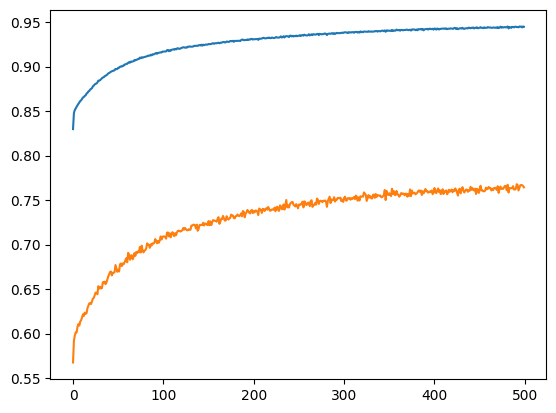

In [ ]:
print(history.params)
plt.plot(history.history['auc'])
#blue is AUC
plt.plot(history.history['accuracy'])
#orange is Accuracy
plt.show()

In [ ]:

model.load_weights('best_model.hdf5')

scores = model.evaluate(X_train,y_train)
print(model.metrics_names)
print(scores)

314/314 [==============================] - 1s 2ms/step - loss: 0.5590 - accuracy: 0.7652
['loss', 'accuracy']
[0.5590354204177856, 0.765239953994751]


In [ ]:

scores = model.evaluate(X_train, y_train)
print(model.metrics_names)
print(scores)
scores = model.evaluate(X_test, y_test)
print(model.metrics_names)
print(scores)

314/314 [==============================] - 0s 1ms/step - loss: 0.5590 - accuracy: 0.7652
['loss', 'accuracy']
[0.5590354204177856, 0.765239953994751]
105/105 [==============================] - 0s 1ms/step - loss: 1.7357 - accuracy: 0.5061
['loss', 'accuracy']
[1.735695719718933, 0.506135880947113]


In [ ]:
print("x_test")
print(X_test[40:50])
print("y_test")
print(y_test[40:50])
prediction = model.predict(X_test)

print("prediction")
print(prediction[40:50])
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,prediction)
print(mse)



x_test
[[-0.32 -1.11 -1.25  0.05  0.02 -0.55  0.31 -2.13 -0.06 -0.46 -0.29 -0.96
   2.05 -0.29  1.02 -1.02  0.92 -0.28 -0.33 -0.17 -0.47 -0.29]
 [ 0.37  1.66  0.03 -0.89 -0.4  -0.63  0.22 -0.74 -0.05 -0.46 -0.29  1.04
  -0.49 -0.29  1.02 -1.02  0.92 -0.28 -0.33 -0.17 -0.47 -0.29]
 [-1.71  0.93 -0.68 -1.54 -1.74 -0.37  1.19 -0.54 -0.94 -0.46 -0.29 -0.96
   2.05 -0.29 -0.98  0.98 -1.09 -0.28  3.01 -0.17 -0.47 -0.29]
 [ 1.57 -0.09  0.3  -1.59 -1.86  0.42 -1.47 -0.69  0.99 -0.46 -0.29  1.04
  -0.49 -0.29 -0.98  0.98  0.92 -0.28 -0.33 -0.17 -0.47 -0.29]
 [ 1.34 -0.88  1.17  0.27  0.43 -0.63 -0.1  -0.28  1.19 -0.46 -0.29  1.04
  -0.49 -0.29  1.02 -1.02  0.92 -0.28 -0.33 -0.17 -0.47 -0.29]
 [ 0.71  1.43 -0.03  0.94  0.61 -0.63  0.83  0.69 -0.58 -0.46 -0.29 -0.96
   2.05 -0.29 -0.98  0.98  0.92 -0.28 -0.33 -0.17 -0.47 -0.29]
 [-1.74 -0.6   1.41 -1.1  -0.95 -0.41 -0.14  1.36 -0.02 -0.46 -0.29  1.04
  -0.49 -0.29  1.02 -1.02 -1.09 -0.28 -0.33 -0.17  2.11 -0.29]
 [ 0.04 -1.11 -0.39  1.75  2.01  2